# Basic Unet on channels

(-0.5, 499.5, 499.5, -0.5)

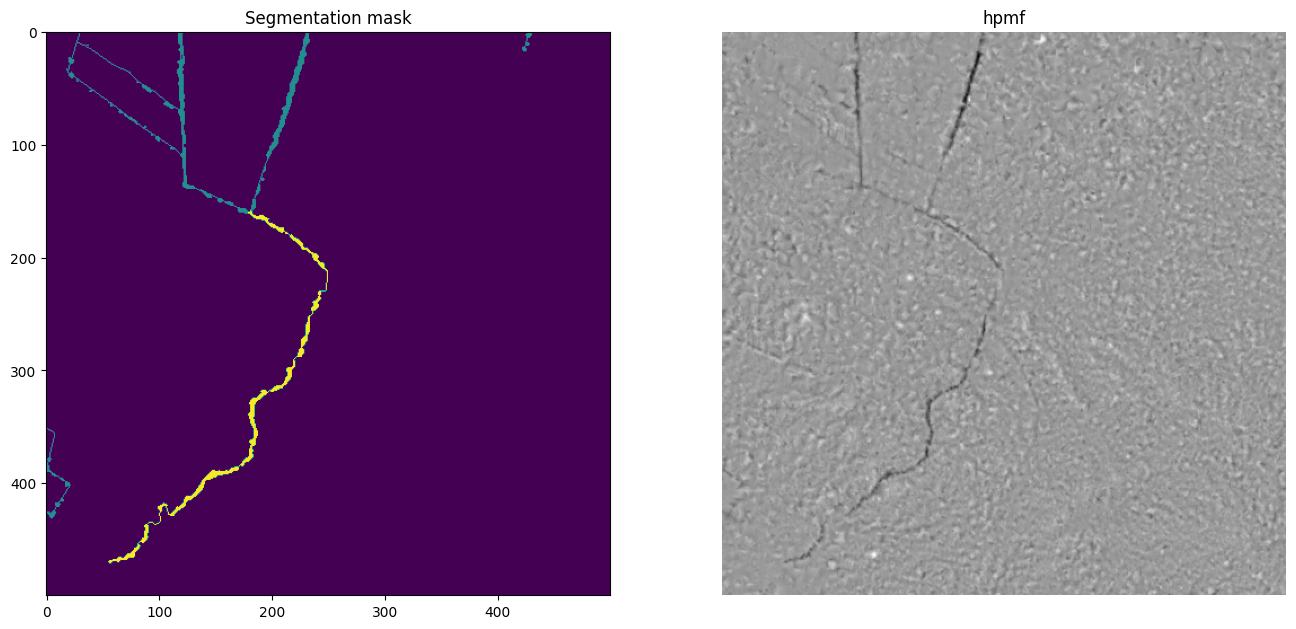

In [27]:
import glob
import matplotlib.pyplot as plt
import tifffile
import numpy as np

plt.rcParams['figure.figsize'] = [16, 16]


labels = glob.glob('/workspace/data/ditches/training/3labels/*.tif')
hpmf = glob.glob('/workspace/data/ditches/training/hpmf/*.tif')


i = 12

f, axarr = plt.subplots(1,2)
axarr[0].set_title("Segmentation mask")
axarr[0].imshow(tifffile.imread(labels[i]), cmap='Pastel1')

axarr[1].set_title("hpmf")
axarr[1].imshow(tifffile.imread(hpmf[i]), cmap='gray')

plt.axis('off')
#plt.savefig('C:/william/writing/Trapping_pits/images/chips'+".png",dpi=(400), bbox_inches='tight')

In [ ]:
labels[i]

# Train a basic UNet

In [ ]:
!python /workspace/code/semantic_segmentation/train.py -I /workspace/data/ditches/training/hpmf/ /workspace/data/ditches/training/2labels/ /workspace/data/logfiles/mariana/basic_unet UNet --seed=1 --epochs=100 --batch_size=32 --classes=0,1,2 --weighting="focal"

2023-05-27 07:16:06.864874: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-27 07:16:10.263972: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-27 07:16:10.266906: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-27 07:16:10.267144: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning

# Plot loss curves

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

df1 = pd.read_csv('/workspace/data/logfiles/test/basic_unet/log.csv', sep =';')
df2 = pd.read_csv('/workspace/data/logfiles/test/pre_trained_UNet/log.csv', sep =';')

sns.lineplot(data=df1, x='epoch', y='loss', color="grey")
sns.lineplot(data=df1, x='epoch', y='val_loss', color="black")
sns.lineplot(data=df2, x='epoch', y='loss', color="grey")
sns.lineplot(data=df2, x='epoch', y='val_loss', color="green")

plt.title('Basic UNet')
plt.legend(labels=['Val loss', 'Loss'])
#plt.ylim(0,1)
#plt.xlim(0,200)
plt.show()

# Evaluate model

In [ ]:
!python /workspace/code/semantic_segmentation/evaluate.py -I /workspace/data/final_data_05m/testing/hillshade/ /workspace/data/final_data_05m/testing/labels/ /workspace/data/logfiles/test/basic_unet/trained.h5 UNet /workspace/data/logfiles/test/basic_unet/test.csv --classes=0,1 